In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from scipy import signal
import IPython.display as ipd


# Setar diretório e arquivo
caminho = 'C:\\Users\\jeanm\\Documents\\Filter-Project\\Data\\'
arquivo_audio1 = "Voz01_16KHz"
arquivo_audio2 = "Voz02_16KHz"
spf1 = wave.open(caminho + arquivo_audio1 + '.wav', 'rb')
ipd.Audio(caminho + arquivo_audio1 + '.wav')  # Ouvir Audio

In [4]:
spf2 = wave.open(caminho + arquivo_audio2 + '.wav', 'rb')
ipd.Audio(caminho + arquivo_audio2 + '.wav')  # Ouvir audio

In [8]:
# Parâmetros Gerais da Simulação
Fs = 16000  # Frequência de Amostragem
SimTime = 8  # Tempo de Simulação (s)
n = np.arange(0, SimTime, 1/Fs)  # Array de Amostras
sz = 128000  # Taxa do Projeto (Hz)
signal1 = np.frombuffer(spf1.readframes(sz), dtype=np.int16)  # Carregar sinal 1
signal2 = np.frombuffer(spf2.readframes(sz), dtype=np.int16)  # Carregar sinal 2

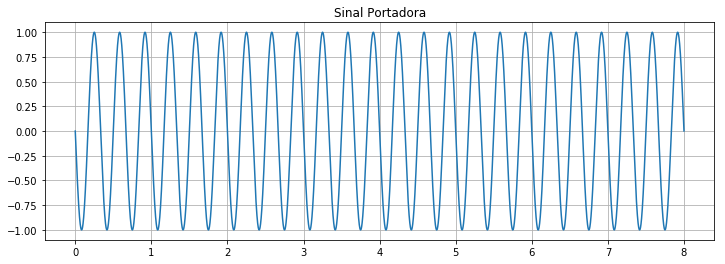

In [14]:
plt.figure(figsize=(12, 4))
plt.title('Sinal Portadora')
plt.plot(n, carrier)
plt.grid()

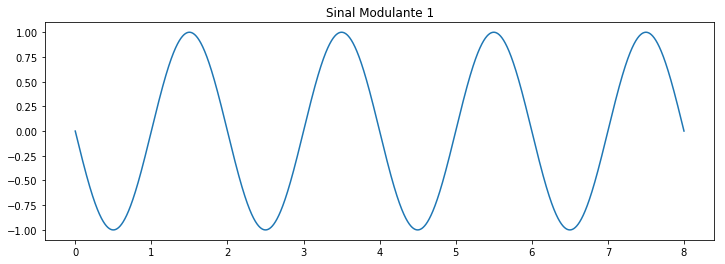

In [21]:
# Criação do sinal Modulante (Somente para testes)
Fm = 0.5  # Frequência do Modulante
Am = 1  # Amplitude do Modulante
phm = np.pi/2  # Fase da Modulante
m = Am*np.cos(2*np.pi*Fm*n + phm)
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.figure(figsize=(12, 4))
plt.title('Sinal Modulante 1')
plt.plot(n, m)

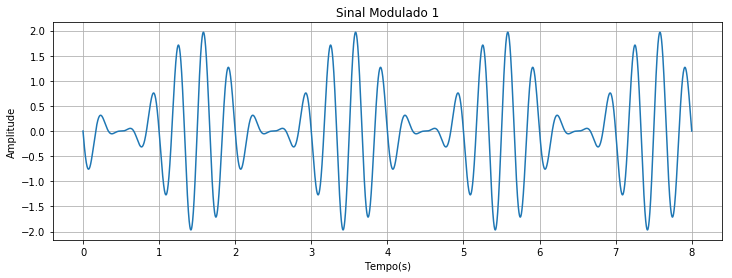

In [22]:
# Modulação Sinal de Audio 1
s = carrier * (1 + m/Ac)
plt.figure(figsize=(12, 4))
plt.plot(n, s)
plt.title('Sinal Modulado 1')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()

Text(0.5, 0, 'Frequência (Hz)')

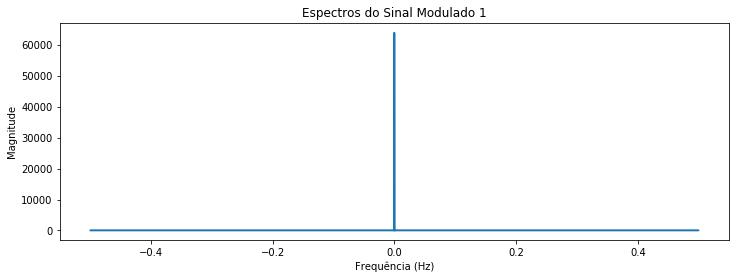

In [29]:
#  Espectros Sinal Modulado 1
spectrum = np.fft.fft(s)
freqs = np.fft.fftfreq(len(spectrum))
magnitude = np.abs(spectrum)    # Amplitude do Sinal
phase = np.angle(spectrum)  # Fase do Sinal
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude)
plt.title('Espectros do Sinal Modulado 1')
plt.ylabel("Magnitude")
plt.xlabel('Frequência (Hz)')

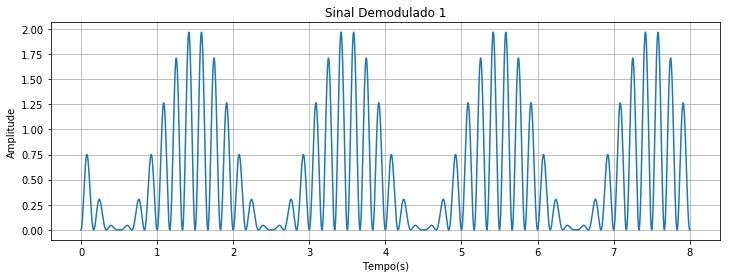

In [24]:
# Demodulação do sinal 1
Pha = np.pi/2
h = s * np.cos(2*np.pi*Fc*n + Pha)
plt.figure(figsize=(12, 4))
plt.plot(n, h)
plt.title('Sinal Demodulado 1')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()

Text(0.5, 0, 'Frequência (Hz)')

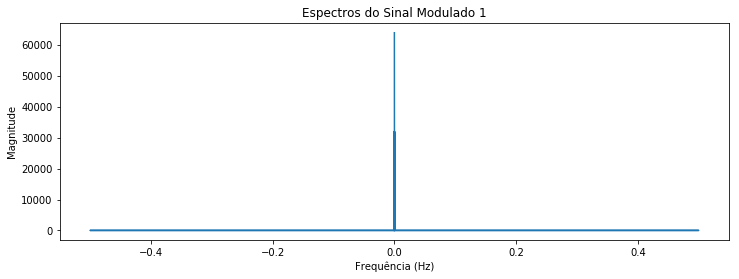

In [25]:
#  Espectros Sinal Demodulado 1
spectrum = np.fft.fft(h)
freqs = np.fft.fftfreq(len(spectrum))
magnitude = np.abs(spectrum)    # Amplitude do Sinal
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude)
plt.title('Espectros do Sinal Modulado 1')
plt.ylabel("Magnitude")
plt.xlabel('Frequência (Hz)')

Text(0.5, 1.0, 'Sinal Filtrado')

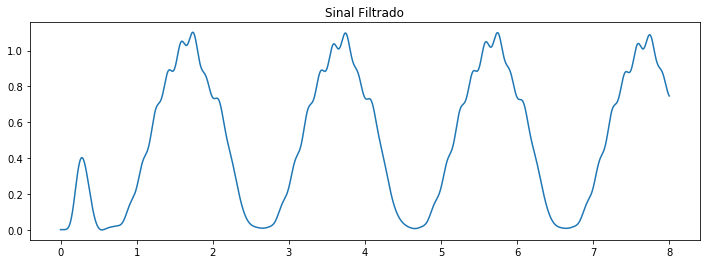

In [32]:
B, A = signal.butter(5, Fc*2/Fs, btype='low')  # 1st order Butterworth low-pass
filtered_signal = signal.lfilter(B, A, h, axis=0)
plt.figure(figsize=(12, 4))
plt.plot(n, filtered_signal)
plt.title('Sinal Filtrado')

Text(0.5, 1.0, 'Sinal Modulante 2')

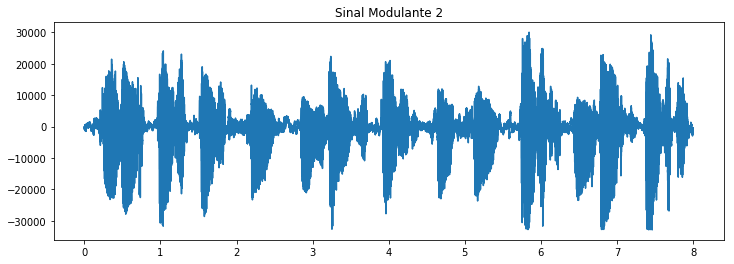

In [30]:
# Plotar sinal de audio 2
samps = 8 * 16000
signal1 = signal.resample(signal1, samps)
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.figure(figsize=(12, 4))
plt.plot(n, signal1)
plt.title('Sinal Modulante 2')

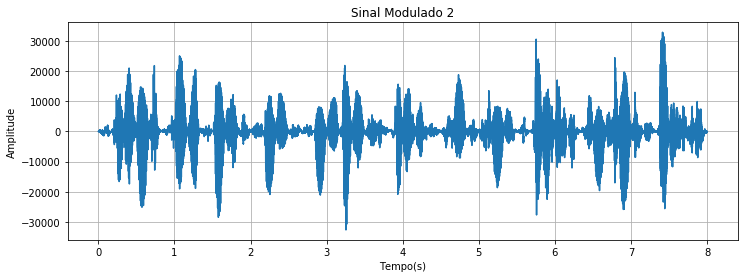

In [34]:
# Modulação Sinal de Audio 2
s = carrier * (1 + signal1/Ac)
plt.figure(figsize=(12, 4))
plt.plot(n, s)
plt.title('Sinal Modulado 2')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()

Text(0.5, 0, 'Frequência (Hz)')

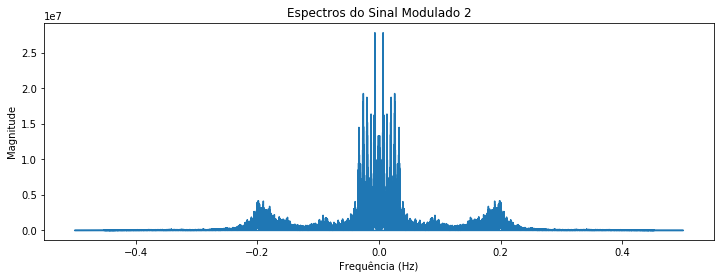

In [38]:
spectrum = np.fft.fft(s)
freqs = np.fft.fftfreq(len(spectrum))
magnitude = np.abs(spectrum)    # Amplitude do Sinal
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude)
plt.title('Espectros do Sinal Modulado 2')
plt.ylabel("Magnitude")
plt.xlabel('Frequência (Hz)')

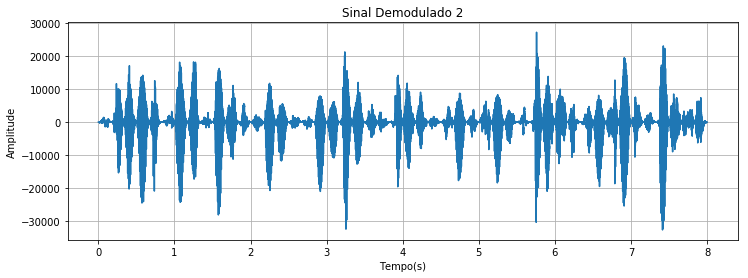

In [40]:
# Demodulação do sinal de audio 2
Pha = np.pi/2
h = s * np.cos(2*np.pi*Fc*n + Pha)
plt.figure(figsize=(12, 4))
plt.plot(n, h)
plt.title('Sinal Demodulado 2')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()

Text(0.5, 0, 'Frequência (Hz)')

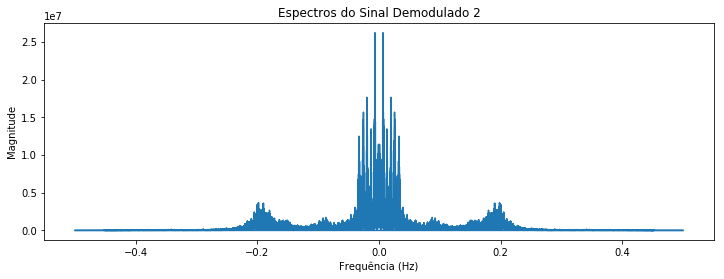

In [44]:
#  Espectros Sinal Demodulado 2
spectrum = np.fft.fft(h)
freqs = np.fft.fftfreq(len(spectrum))
magnitude = np.abs(spectrum)    # Amplitude do Sinal
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude)
plt.title('Espectros do Sinal Demodulado 2')
plt.ylabel("Magnitude")
plt.xlabel('Frequência (Hz)')